# OpenAI: tiktoken


* tiktoken is a fast BPE tokeniser for use with OpenAI's models.

* A helpful rule of thumb is that one token generally corresponds to ~4 characters of text for common English text. This translates to roughly ¾ of a word (so 100 tokens ~= 75 words).
  
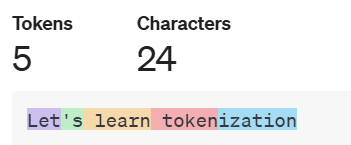

In [2]:
# !pip install tiktoken

In [1]:
import tiktoken

In [1]:
def tokenize(text, encoding, model):
    encoding = tiktoken.get_encoding(encoding)
    encoding_model = tiktoken.encoding_for_model(model)
    
    encode_token = encoding.encode(text)
    num_tk = len(encode_token)
    decode_token = encoding.decode(encode_token)
    single_token_decode = [encoding.decode_single_token_bytes(token) for token in encode_token]
    
    model_encode_token = encoding_model.encode(text)
    num_model_tk = len(model_encode_token)
    model_decode_token = encoding_model.decode(model_encode_token)
    single_model_token_decode = [encoding_model.decode_single_token_bytes(token) for token in model_encode_token]
    
    print("\n\nEncoding name {} based results: \n".format(encoding))
    print("Encoding: {}, tokenwise_decode: {}, number of token: {}, decoding: {}".format(encode_token, single_token_decode, num_tk, decode_token))

    print("\n\nOpenAI model name {} based results: \n".format(model))
    print("Encoding: {}, tokenwise_decode: {}, number of token: {}, decoding: {}".format(model_encode_token, single_model_token_decode, num_model_tk, model_decode_token))
    

In [3]:
text = "let's learn tokenization."
tokenize(text, 'o200k_base', 'gpt-4o')



Encoding name <Encoding 'o200k_base'> based results: 

Encoding: [1347, 885, 4484, 6602, 2860, 13], tokenwise_decode: [b'let', b"'s", b' learn', b' token', b'ization', b'.'], number of token: 6, decoding: let's learn tokenization.


OpenAI model name gpt-4o based results: 

Encoding: [1347, 885, 4484, 6602, 2860, 13], tokenwise_decode: [b'let', b"'s", b' learn', b' token', b'ization', b'.'], number of token: 6, decoding: let's learn tokenization.


In [4]:
encoding_name = ['o200k_base', 'cl100k_base', 'p50k_base', 'r50k_base']
model_name = ['gpt-4o-mini', 'gpt-4', 'text-davinci-002', 'davinci']
text = "let's learn tokenization."
[tokenize(text, encoding_name[i], model_name[i]) for i in range(len(model_name))]



Encoding name <Encoding 'o200k_base'> based results: 

Encoding: [1347, 885, 4484, 6602, 2860, 13], tokenwise_decode: [b'let', b"'s", b' learn', b' token', b'ization', b'.'], number of token: 6, decoding: let's learn tokenization.


OpenAI model name gpt-4o-mini based results: 

Encoding: [1347, 885, 4484, 6602, 2860, 13], tokenwise_decode: [b'let', b"'s", b' learn', b' token', b'ization', b'.'], number of token: 6, decoding: let's learn tokenization.


Encoding name <Encoding 'cl100k_base'> based results: 

Encoding: [1169, 596, 4048, 4037, 2065, 13], tokenwise_decode: [b'let', b"'s", b' learn', b' token', b'ization', b'.'], number of token: 6, decoding: let's learn tokenization.


OpenAI model name gpt-4 based results: 

Encoding: [1169, 596, 4048, 4037, 2065, 13], tokenwise_decode: [b'let', b"'s", b' learn', b' token', b'ization', b'.'], number of token: 6, decoding: let's learn tokenization.


Encoding name <Encoding 'p50k_base'> based results: 

Encoding: [1616, 338, 2193, 11241

[None, None, None, None]

# HuggingFace

### Normalization & Pre-tokenization

* The normalization step involves some general cleanup, such as removing needless whitespace, lowercasing, and/or removing accents.
* The pre=tokenization splits the texts into small entities, like words.


In [3]:
from transformers import AutoTokenizer

def pre_tokenize(tokenizer, text):
    print("Tokenizer from tokenizer class: \n ", type(tokenizer.backend_tokenizer))
    normalized_out = tokenizer.backend_tokenizer.normalizer.normalize_str(text)
    pretoken_out = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(normalized_out)
    return normalized_out, pretoken_out
    

In [4]:
# BERT tokenizer, the pre-tokenization involves splitting on whitespace and punctuation.

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
text = "Héllò hôw are ü?"
normalize, pre_token = pre_tokenize(tokenizer, text)
print("original text: ", text)
print("Normalization: ", normalize)
print("Pre-tokenization: ", pre_token)

Tokenizer from tokenizer class: 
  <class 'tokenizers.Tokenizer'>
original text:  Héllò hôw are ü?
Normalization:  hello how are u?
Pre-tokenization:  [('hello', (0, 5)), ('how', (6, 9)), ('are', (10, 13)), ('u', (14, 15)), ('?', (15, 16))]


In [21]:
# GPT2 keeps the spaces and replace them with a Ġ symbol

tokenizer = AutoTokenizer.from_pretrained("gpt2")
text = "Hello how are u?"
pre_token = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)
print("original text: ", text)
print("Pre-tokenization: ", pre_token)

original text:  Hello how are u?
Pre-tokenization:  [('Hello', (0, 5)), ('Ġhow', (5, 9)), ('Ġare', (9, 13)), ('Ġu', (13, 15)), ('?', (15, 16))]


In [5]:
 # T5 keeps spaces and replaces them with a specific token (_), but the T5 tokenizer only splits on whitespace, not punctuation. 
# Also note that it added a space by default at the beginning of the sentence (before Hello) and ignored the double space between are and you.

tokenizer = AutoTokenizer.from_pretrained("t5-small")
text = "Hello how are u?"
pre_token = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)
print("original text: ", text)
print("Pre-tokenization: ", pre_token)

original text:  Hello how are u?
Pre-tokenization:  [('▁Hello', (0, 5)), ('▁how', (6, 9)), ('▁are', (10, 13)), ('▁u?', (14, 16))]


### Wordpiece, BPE, Sentencepiece methods

In [16]:
from transformers import BertTokenizer

# wordpiece
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text = "Let's start understanding tokenization."
encoding = tokenizer(text, return_tensors='pt')
print("Bert tokens: ", encoding)
decode = tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])
print("Bert decode output: ", decode)

Bert tokens:  {'input_ids': tensor([[  101,  2292,  1005,  1055,  2707,  4824, 19204,  3989,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
Bert decode output:  ['[CLS]', 'let', "'", 's', 'start', 'understanding', 'token', '##ization', '.', '[SEP]']


In [17]:
from transformers import GPT2Tokenizer

# BPE
tokenizer = GPT2Tokenizer.from_pretrained('openai-community/gpt2')
text = "Let's start understanding tokenization."
encoding = tokenizer(text, return_tensors='pt')
print("GPT2 tokens: ", encoding)
decode = tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])
print("GPT2 decode output: ", decode)

GPT2 tokens:  {'input_ids': tensor([[ 5756,   338,   923,  4547, 11241,  1634,    13]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}
GPT2 decode output:  ['Let', "'s", 'Ġstart', 'Ġunderstanding', 'Ġtoken', 'ization', '.']


In [18]:
from transformers import XLNetTokenizer

# sentencepiece
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
text = "Let's start understanding tokenization."
encoding = tokenizer(text, return_tensors='pt')
print("XLNet tokens: ", encoding)
decode = tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])
print("XLNet decode output: ", decode)

XLNet tokens:  {'input_ids': tensor([[ 2834,    26,    23,   467,  2172, 17366,  1822,     9,     4,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
XLNet decode output:  ['▁Let', "'", 's', '▁start', '▁understanding', '▁token', 'ization', '.', '<sep>', '<cls>']


# Compare GPT2 tokens and GPT4 tokens

* GPT 4 combines more white spaces than GPT 2
* For given example, GPT 2 has 10 tokens where as GPT 4 has 7 tokens.

In [13]:
# gpt2 
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
text = "Hi, how are     you?"
result = tokenizer(text, return_tensors='pt')
print("GPT2 output: ", result)
print("token length: ", len(result['input_ids'][0]))
decode_result = tokenizer.convert_ids_to_tokens(result['input_ids'][0])
decode = tokenizer.decode(result['input_ids'][0])
print("decoding output:", decode_result, decode)

GPT2 output:  {'input_ids': tensor([[17250,    11,   703,   389,   220,   220,   220,   220,   345,    30]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
token length:  10
decoding output: ['Hi', ',', 'Ġhow', 'Ġare', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġyou', '?'] Hi, how are     you?


In [15]:
# gpt4
import tiktoken


encoding = tiktoken.encoding_for_model('gpt-4')
text = "Hi, how are     you?"
result= encoding.encode(text)
print("GPT4 output:", result)
print("token length: ", len(result))
decode_result = [encoding.decode_single_token_bytes(token) for token in result]
decode = encoding.decode(result)
print("decoding output: ", decode_result, decode)

GPT4 output: [13347, 11, 1268, 527, 257, 499, 30]
token length:  7
decoding output:  [b'Hi', b',', b' how', b' are', b'    ', b' you', b'?'] Hi, how are     you?
